In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [23]:
# Chargement du dataset: 
import kagglehub
import os
import chardet

path = kagglehub.dataset_download("vivek468/superstore-dataset-final")
csv_file = os.path.join(path, "Sample - Superstore.csv")

with open(csv_file, "rb") as f:
    raw = f.read()

enc = chardet.detect(raw)
print(enc)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [24]:
df = pd.read_csv(csv_file, encoding="Windows-1252")

In [25]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [26]:
df.info

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [27]:
df.dtypes

Row ID             int64
Order ID             str
Order Date           str
Ship Date            str
Ship Mode            str
Customer ID          str
Customer Name        str
Segment              str
Country              str
City                 str
State                str
Postal Code        int64
Region               str
Product ID           str
Category             str
Sub-Category         str
Product Name         str
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [28]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [29]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='str')

In [46]:
from decimal import Decimal

# ---- ÉTAPE 1 : Nettoyer les noms de colonnes ----
def clean_columns(df):
    df = df.copy()
    
    # Nettoyage des noms de colonnes
    df.columns = (
        df.columns.str.strip()
                  .str.lower()
                  .str.replace(r'[^\w\s]', '', regex=True)
                  .str.replace(r'\s+', '_', regex=True)
    )
    
    # 🔴 Suppression du colonne row_id (après nettoyage du nom)
    if "row_id" in df.columns:
        df = df.drop(columns=["row_id"])
    
    return df


# ---- ÉTAPE 2 : Conversion des types 
def convert_types(df):
    df = df.copy()
    
    # Conversion en string
    df['postal_code'] = df['postal_code'].astype(str)
    
    # Conversion en datetime
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
    df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')
    
    # Conversion en float
    df['sales'] = df['sales'].astype(float)
    df['discount'] = df['discount'].astype(float)
    
    
    return df


# ---- ÉTAPE 3 : Pipeline complet ----
def pipeline(df):
    df = clean_columns(df)
    df = convert_types(df)
    
    # 🔹 Vérification et suppression des doublons
    print("Nombre de doublons avant suppression:", df.duplicated().sum())
    df = df.drop_duplicates()
    print("Nombre de doublons après suppression:", df.duplicated().sum())
    
    return df


# ---- ÉTAPE 4 : Application du pipeline ----
df_cleaned = pipeline(df)

# Vérification
print(df_cleaned.dtypes)
print(df_cleaned.head())


Nombre de doublons avant suppression: 1
Nombre de doublons après suppression: 0
order_id                    str
order_date       datetime64[us]
ship_date        datetime64[us]
ship_mode                   str
customer_id                 str
customer_name               str
segment                     str
country                     str
city                        str
state                       str
postal_code                 str
region                      str
product_id                  str
category                    str
subcategory                 str
product_name                str
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object
         order_id order_date  ship_date       ship_mode customer_id  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Cla

Ce projet consiste à mieux comprendre les ventes de SuperStore, ses produits, ses clients et ses performances logistiques pour maximiser le profit global, la gestion des stocks et des livraisons, identifier les clients et produits stratégiques et à prendre des décisions basées sur les données pour les promotions et les stratégies de vente.  

## Problèmatique: 
* Quels produits devraient être mis en avant pour maximiser le profit ? "prédiction du profit par commande"

* Quels clients devraient être ciblés pour des promotions personnalisées? "segmentation des clients" autrement-dit : identifier des groupes de clients à forte valeur ou clients à risque

In [31]:
df_cleaned.head(1)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [32]:
# Création de la colonne 'shipping_time' en jours
df_cleaned['shipping_time_days'] = (df_cleaned["ship_date"] - df_cleaned['order_date']).dt.days

# Vérification
df_cleaned[['order_date', 'ship_date', 'shipping_time_days']].head()


,order_date,ship_date,shipping_time_days
0,2016-11-08,2016-11-11,3
1,2016-11-08,2016-11-11,3
2,2016-06-12,2016-06-16,4
3,2015-10-11,2015-10-18,7
4,2015-10-11,2015-10-18,7


In [33]:
df_cleaned.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'subcategory', 'product_name',
       'sales', 'quantity', 'discount', 'profit', 'shipping_time_days'],
      dtype='str')

* Analyse descriptive (KPIs)

In [34]:
# Chiffre d'affaire total et profit total

total_sales = df_cleaned['sales'].sum()
total_profit = df_cleaned['profit'].sum()
avg_discount = df_cleaned['discount'].mean()
avg_shipping_time = df_cleaned['shipping_time_days'].mean()

display(f"Total Sales: ${total_sales:,.2f}")
display(f"Total Profit: ${total_profit:,.2f}")
display(f"Average Discount: {avg_discount:.2%}")
display(f"Average Shipping Time: {avg_shipping_time:.2f} days")

'Total Sales: $2,296,919.49'

'Total Profit: $286,409.08'

'Average Discount: 15.62%'

'Average Shipping Time: 3.96 days'

In [48]:
df_cleaned.describe()

,order_date,ship_date,sales,quantity,discount,profit
count,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000
mean,2016-04-30 01:53:33.089162,2016-05-04 00:53:19.039327,229.852846,3.789753,0.156188,28.660971
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.731000
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,54.480000,3.000000,0.200000,8.671000
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,623.276074,2.225149,0.206457,234.271476


* Analyse par Catégorie et Région

In [50]:
# Profit par catégorie
profit_category = df_cleaned.groupby('category')['profit'].sum().sort_values(ascending=False)
print(profit_category)

# Profit par région
profit_region = df_cleaned.groupby('region')['profit'].sum().sort_values(ascending=False)
print(profit_region)

# Visualisation avec Plotly
colors= ["red" if x < 0 else "green" for x in profit_category.values]
fig = px.bar(
    profit_category,
    x=profit_category.index,
    y=profit_category.values,
    title="Profit par Category",
    labels={'x':'Category','y':'Profit'},
    color=profit_category.index,    # utiliser seulement la catégorie pour appliquer la couleur
    color_discrete_sequence=colors
)

fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')
fig.update_layout(template='plotly_white', xaxis_tickangle=-30)
fig.show()

category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18463.3316
Name: profit, dtype: float64
region
West       108418.4489
East        91534.8388
South       46749.4303
Central     39706.3625
Name: profit, dtype: float64


In [51]:
fig = px.bar(
    profit_region, 
    x=profit_region.index, 
    y=profit_region.values, 
    title="Profit par Region", 
    labels={'x':'Region','y':'Profit'}, 
    color=profit_region.index, 
    color_discrete_sequence=colors)
fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')
fig.update_layout(template='plotly_white', xaxis_tickangle=-30)
fig.show()

* Relation entre Discount et Profit: 

Que se passe-t-il pour le profit à chaque niveau de Discount ? 


In [36]:
df_cleaned['discount_bin'] = pd.cut(
    df_cleaned['discount'],
    bins=[-0.01, 0, 0.1, 0.2, 0.3, 1],
    labels=['0%', '0–10%', '10–20%', '20–30%', '30%+']
)

profit_by_discount = df_cleaned.groupby('discount_bin')['profit'].mean()
profit_by_discount


discount_bin
0%         66.900292
0–10%      96.055074
10–20%     24.738824
20–30%    -45.828401
30%+     -107.209930
Name: profit, dtype: float64

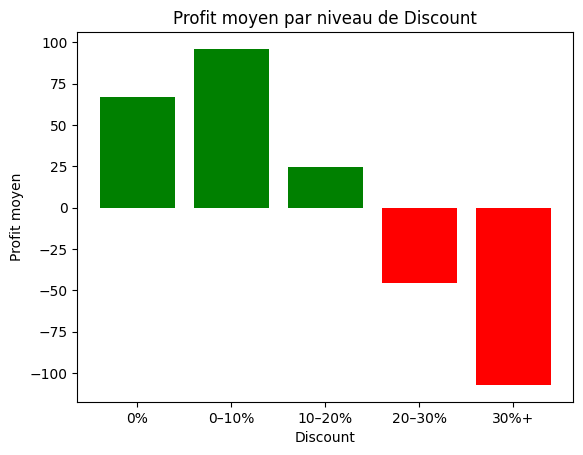

In [63]:
import matplotlib.pyplot as plt
 
colors = ['green' if x >= 0 else 'red' for x in profit_by_discount.values]

plt.bar(profit_by_discount.index, profit_by_discount.values, color=colors)
plt.title("Profit moyen par niveau de Discount")
plt.xlabel("Discount")
plt.ylabel("Profit moyen")
plt.show()


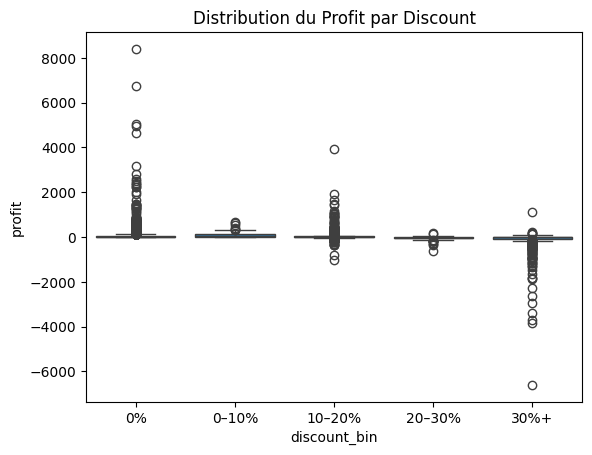

In [38]:
sns.boxplot(
    data=df_cleaned,
    x='discount_bin',
    y='profit'
)
plt.title("Distribution du Profit par Discount")
plt.show()


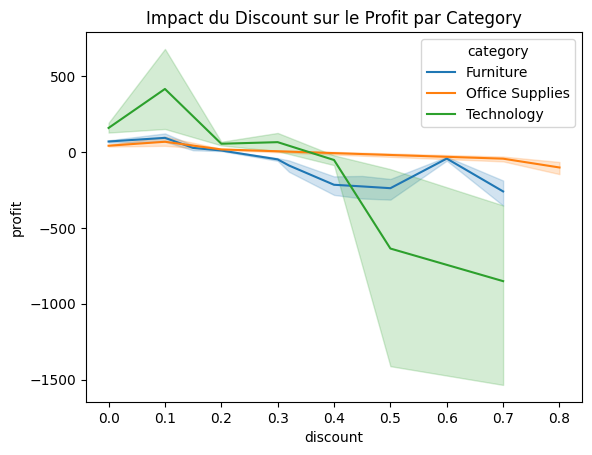

In [39]:
sns.lineplot(
    data=df_cleaned,
    x='discount',
    y='profit',
    hue='category',
    estimator='mean'
)
plt.title("Impact du Discount sur le Profit par Category")
plt.show()


In [40]:
correlation = df_cleaned['discount'].corr(
    df_cleaned['profit'],
    method='spearman'
)
print(f"Spearman Correlation: {correlation:.2f}")


Spearman Correlation: -0.54


# Relation entre Discount et Profit
* La relation entre le discount et le profit n'est pas linéaire. 
* Les faibles discounts(<= 10%) préservent généralement la rentabilité.
* Les discounts élevés (>= 20%) augmentent la volatilité et le risque de pertes. 
* L'impact du discount varie selon la catégorie de produits. 

# Conclusion: 
Une analyse par niveau de discount et par catégorie est plus pertinente qu'une corrélation globale. 



### Analyse des modes de livraison

ship_mode
Same Day          0.044199
First Class       2.182705
Second Class      3.238046
Standard Class    5.006704
Name: shipping_time_days, dtype: float64


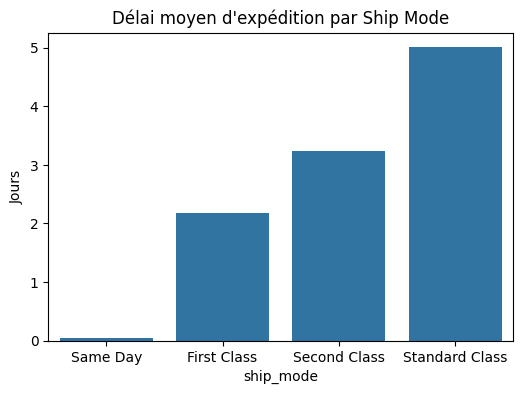

In [41]:
# Délai moyen d'expédition par Ship Mode
shipping_mode = df_cleaned.groupby('ship_mode')['shipping_time_days'].mean().sort_values()
print(shipping_mode)

# Visualisation
plt.figure(figsize=(6,4))
sns.barplot(x=shipping_mode.index, y=shipping_mode.values)
plt.title("Délai moyen d'expédition par Ship Mode")
plt.ylabel("Jours")
plt.show()


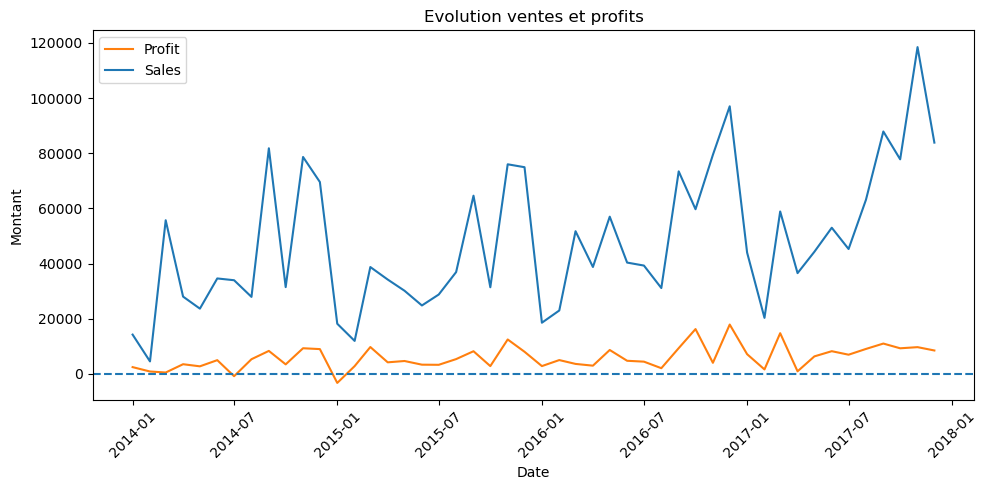

In [33]:
plt.figure(figsize=(10,5))

# Profit en orange par défaut matplotlib
plt.plot(
    monthly["year_month"],
    monthly["profit"],
    label="Profit",
    color="tab:orange"
)

# Sales en bleu par défaut matplotlib
plt.plot(
    monthly["year_month"],
    monthly["sales"],
    label="Sales",
    color="tab:blue"
)

plt.axhline(0, linestyle="--")

plt.title("Evolution ventes et profits")
plt.xlabel("Date")
plt.ylabel("Montant")
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

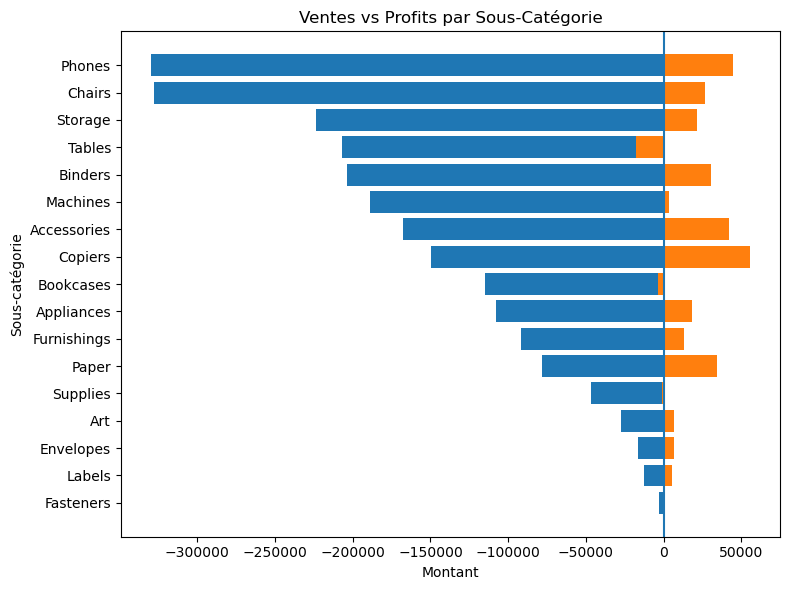

In [34]:
# ===== Ventes vs Profits par Sous-Catégorie =====

subcat = (
    df_cleaned
    .groupby("subcategory")[["sales", "profit"]]
    .sum()
    .sort_values("sales")
)

sales = -subcat["sales"]   # gauche
profit = subcat["profit"]  # droite

plt.figure(figsize=(8,6))

plt.barh(subcat.index, sales)
plt.barh(subcat.index, profit)

plt.axvline(0)

plt.title("Ventes vs Profits par Sous-Catégorie")
plt.xlabel("Montant")
plt.ylabel("Sous-catégorie")

plt.tight_layout()
plt.show()


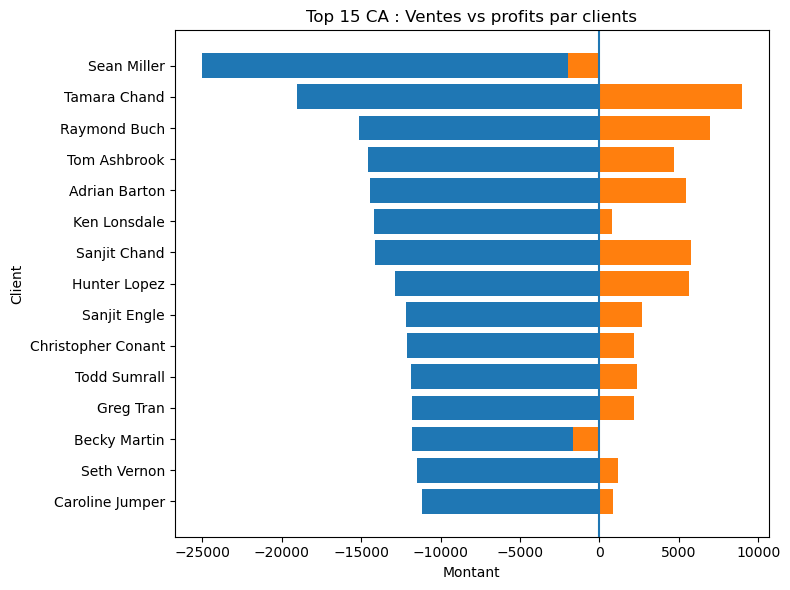

In [27]:
# ===== Top 15 CA : Ventes vs Profits par Clients =====

top_clients = (
    df_cleaned
    .groupby("customer_name")[["sales", "profit"]]
    .sum()
    .sort_values("sales", ascending=False)
    .head(15)
)

# Trier pour affichage horizontal propre
top_clients = top_clients.sort_values("sales")

sales = -top_clients["sales"]   # ventes à gauche
profit = top_clients["profit"]  # profits à droite

plt.figure(figsize=(8,6))

plt.barh(top_clients.index, sales)
plt.barh(top_clients.index, profit)

plt.axvline(0)

plt.title("Top 15 CA : Ventes vs profits par clients")
plt.xlabel("Montant")
plt.ylabel("Client")

plt.tight_layout()
plt.show()


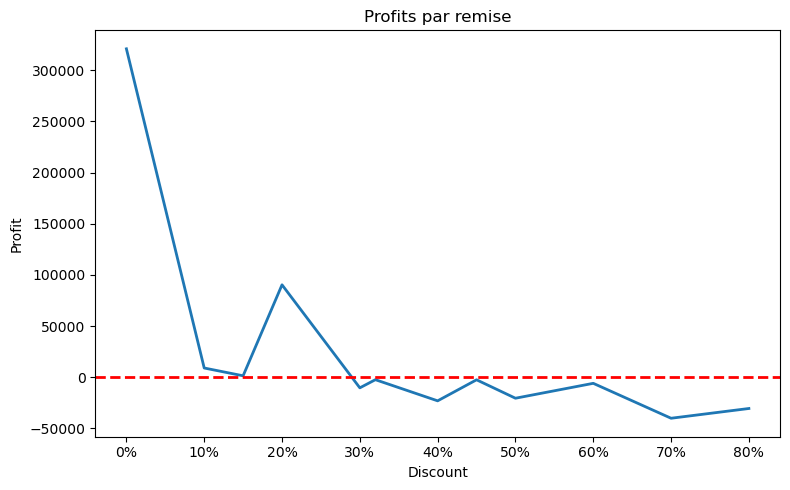

In [28]:
# ===== Profits par remise =====

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

profit_discount = (
    df_cleaned
    .groupby("discount")["profit"]
    .sum()
    .reset_index()
    .sort_values("discount")
)

plt.figure(figsize=(8,5))

# Ligne principale (bleue par défaut)
plt.plot(
    profit_discount["discount"],
    profit_discount["profit"],
    linewidth=2
)

# Ligne horizontale rouge
plt.axhline(0, linestyle="--", color="red", linewidth=2)

# Format axe X en %
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title("Profits par remise")
plt.xlabel("Discount")
plt.ylabel("Profit")

plt.tight_layout()
plt.show()


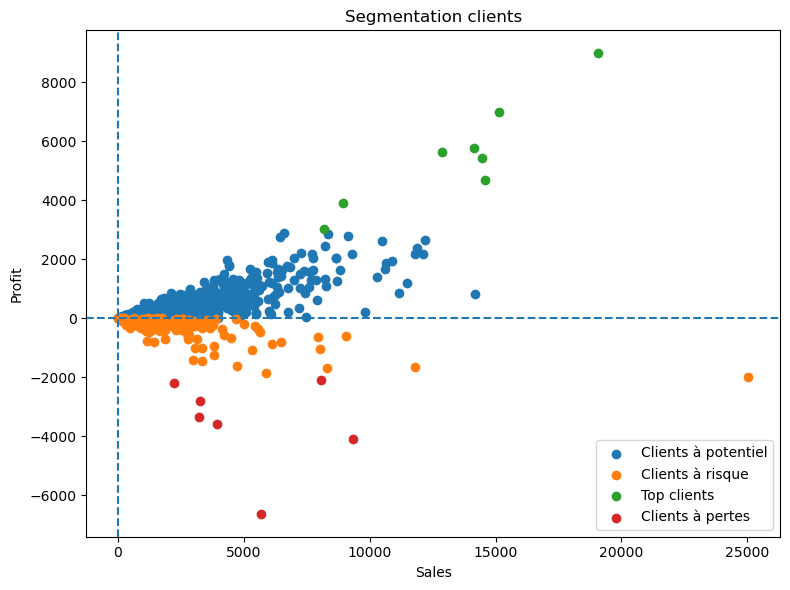

In [31]:
# ===== Segmentation Clients basée sur le profit =====

# Agrégation par client
client_perf = (
    df_cleaned
    .groupby("customer_name")[["sales", "profit"]]
    .sum()
    .reset_index()
)

# Fonction de segmentation selon tes règles
def segment(row):
    if row["profit"] <= -2000:
        return "Clients à pertes"
    elif -2000 < row["profit"] < 0:
        return "Clients à risque"
    elif row["profit"] >= 3000:
        return "Top clients"
    else:
        return "Clients à potentiel"

client_perf["segment"] = client_perf.apply(segment, axis=1)

# ===== Graphique =====

plt.figure(figsize=(8,6))

for s in client_perf["segment"].unique():
    subset = client_perf[client_perf["segment"] == s]
    plt.scatter(subset["sales"], subset["profit"], label=s)

plt.axhline(0, linestyle="--")
plt.axvline(0, linestyle="--")

plt.title("Segmentation clients")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend()

plt.tight_layout()
plt.show()
